I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.
Description of Variables
The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
dta = sm.datasets.fair.load_pandas().data

In [25]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [3]:
dta.shape

(6366, 9)

In [4]:
# 0 represents not 
dta['affair'] = (dta.affairs > 0).astype(int) 
y,X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [5]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [6]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


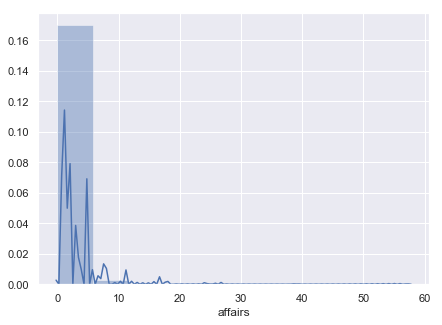

In [23]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams
sns.set(rc={'figure.figsize':(7,5)})
sns.distplot(dta['affairs'], bins=10)
plt.show()

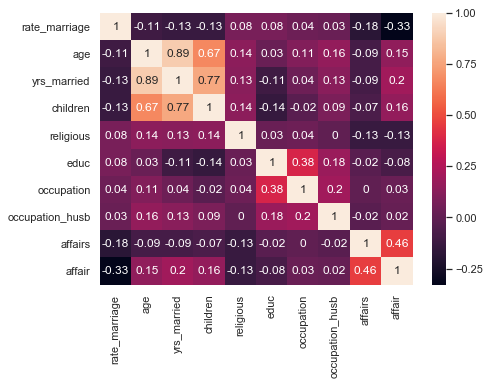

In [24]:
correlation_matrix = dta.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)